# 7. Персептрон

In [1]:
from setup_libs import *

In [2]:
import torch

## 7.1 Нейрон (персептрон)

### Устройство нейрона

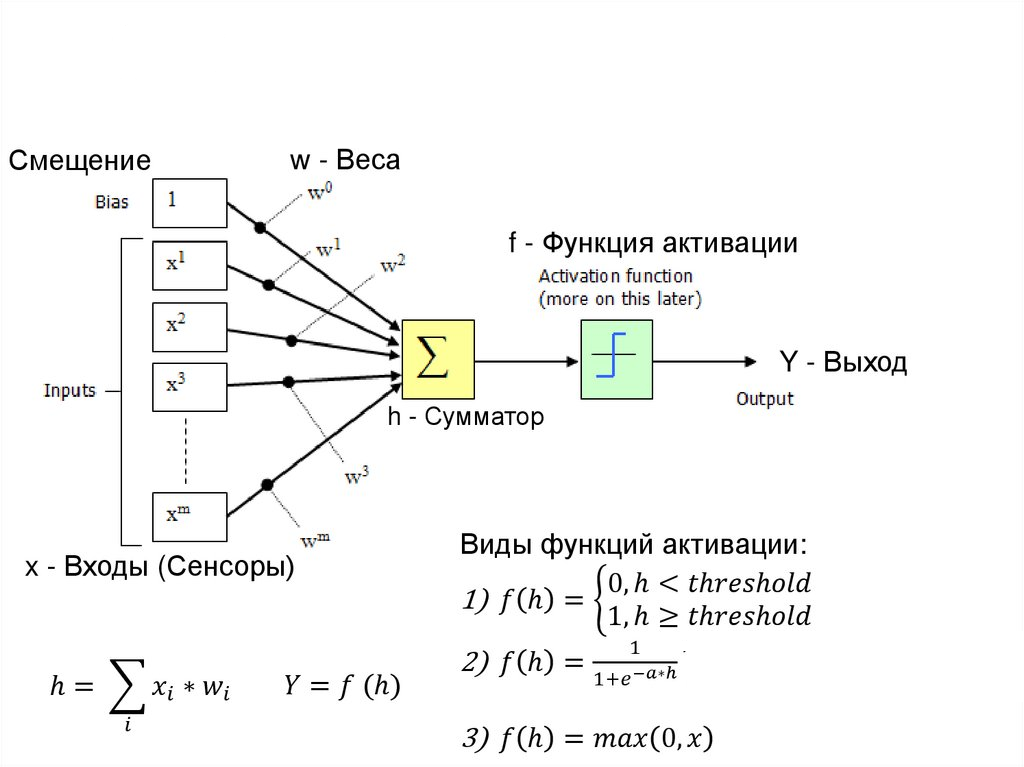

In [3]:
Image('images/perc1.png')

In [4]:
import torch.nn as nn

x = torch.FloatTensor([[2, 4]])

l = nn.Linear(in_features=2, 
              out_features=1) # по сути матричное перемножение на веса 2 -> 1

# если ручками не обозначить, то будут произвольные значения браться
l.weight.data = torch.FloatTensor([[1, 1]])
l.bias.data   = torch.FloatTensor([[-1]])

s = nn.Sigmoid()

def net(x):
    return s(l(x))

net(x)

tensor([[0.9933]], grad_fn=<SigmoidBackward0>)

Рисуем линию
$x_1 + x_2 - 1 = 0$

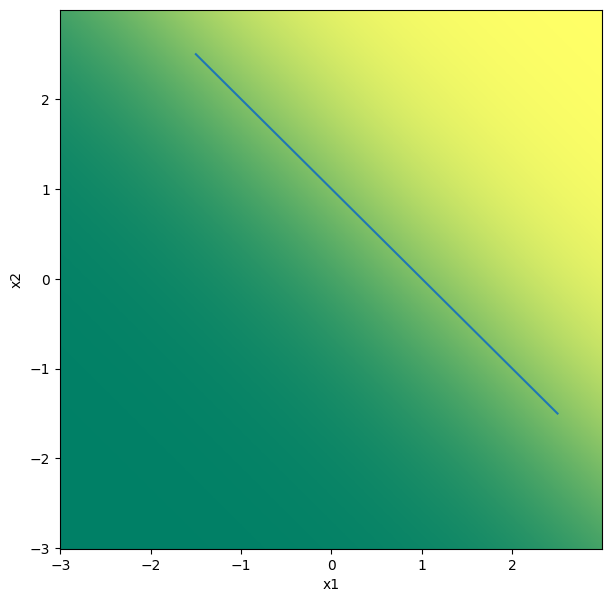

In [5]:
xx, yy = np.meshgrid(np.arange(-3, 3, .01), np.arange(-3, 3,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

predicted = net(torch.FloatTensor(input_field)).data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='summer')
plt.xlabel('x1')
plt.ylabel('x2')

x_1 = np.linspace(-1.5, 2.5, 100)
x_2 = 1 - x_1 

ax.plot(x_1, x_2)

### Логические функции через нейрон

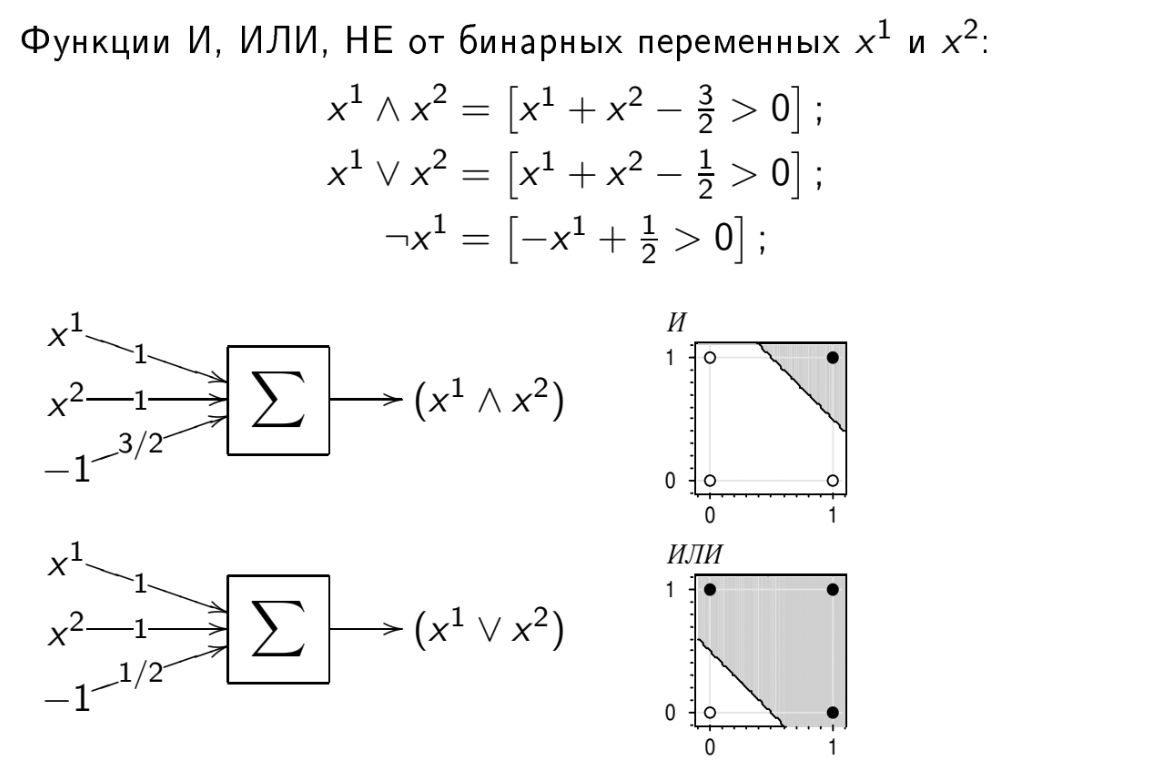

In [6]:
Image('images/logic1.png', width=800)

In [7]:
x = torch.FloatTensor([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])

In [8]:
def AND(x):
    lin = nn.Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, 1]])
    lin.bias.data   = torch.FloatTensor([[-1.5]])

    return (lin(x) > 0).float() # функция активации

AND(x)

tensor([[0.],
        [0.],
        [0.],
        [1.]])

In [9]:
def OR(x):
    lin = nn.Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, 1]]) 
    lin.bias.data   = torch.FloatTensor([[-0.5]])

    return (lin(x) > 0).float() #функция активации

OR(x)

tensor([[0.],
        [1.],
        [1.],
        [1.]])

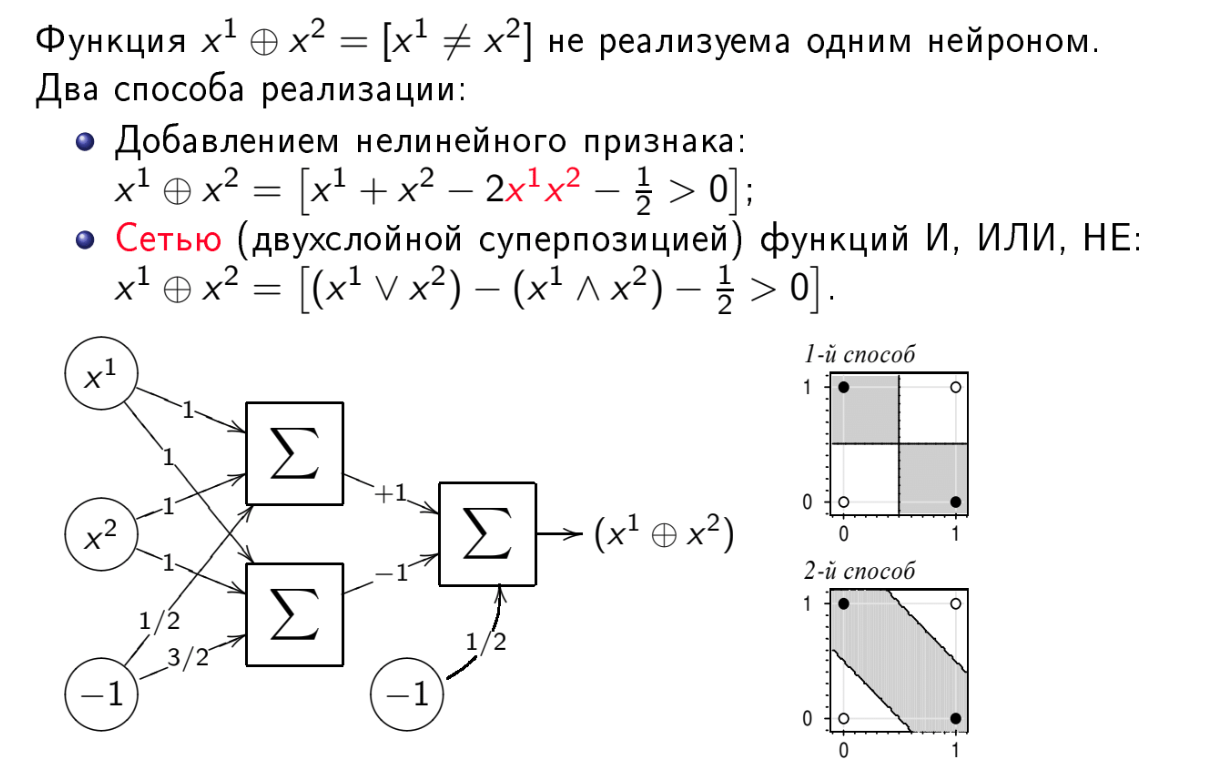

In [10]:
Image('images/xor.png', width=800)

In [11]:
second_input = torch.cat([OR(x), AND(x)], dim=1)
second_input

tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])

In [12]:
def XOR(x):
    lin = nn.Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, -1]])
    lin.bias.data   = torch.FloatTensor([[-0.5]])

    return (lin(x) > 0).float()

XOR(second_input) 

tensor([[0.],
        [1.],
        [1.],
        [0.]])

Зачем обозначать руками нейроны, когда можно целые слои  

In [13]:
def OR_AND(x):
    lin1 = nn.Linear(2, 2) #СЛОЙ 2->2
    
    lin1.weight.data = torch.FloatTensor([[1, 1], 
                                          [1, 1]])
    
    lin1.bias.data   = torch.FloatTensor([[-0.5, -1.5]])
    
    return (lin1(x) > 0).float()

XOR(OR_AND(x))

tensor([[0.],
        [1.],
        [1.],
        [0.]])

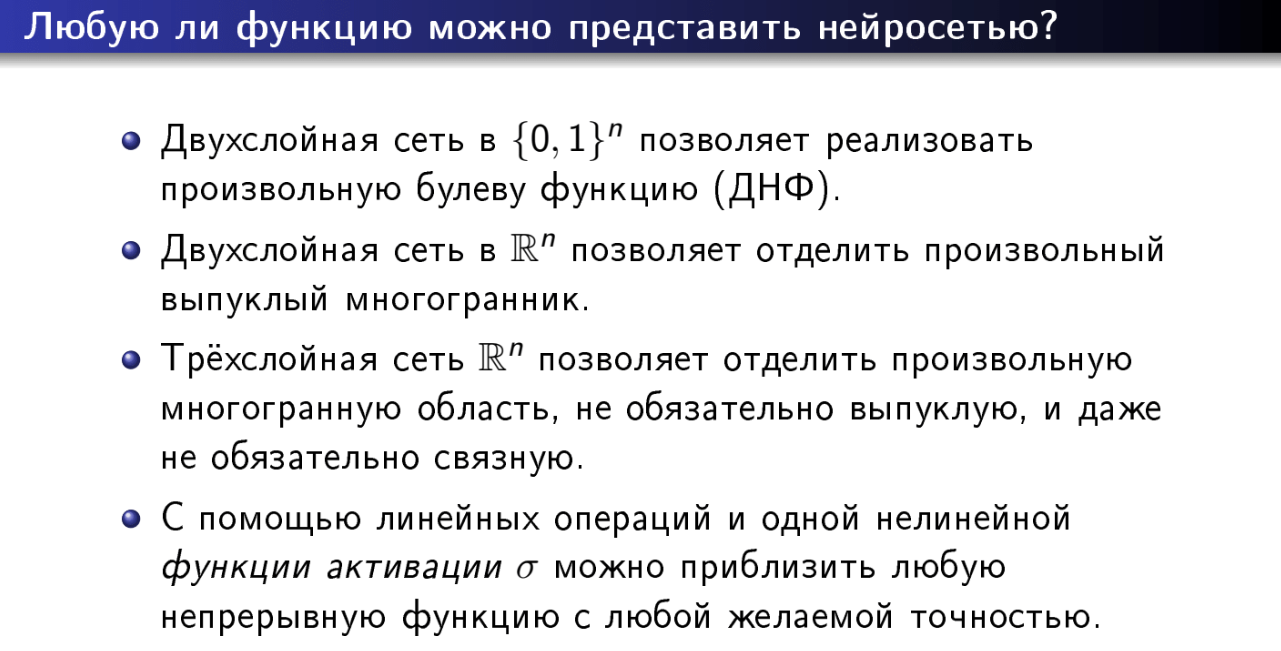

In [14]:
Image('images/percres.png', width=800)

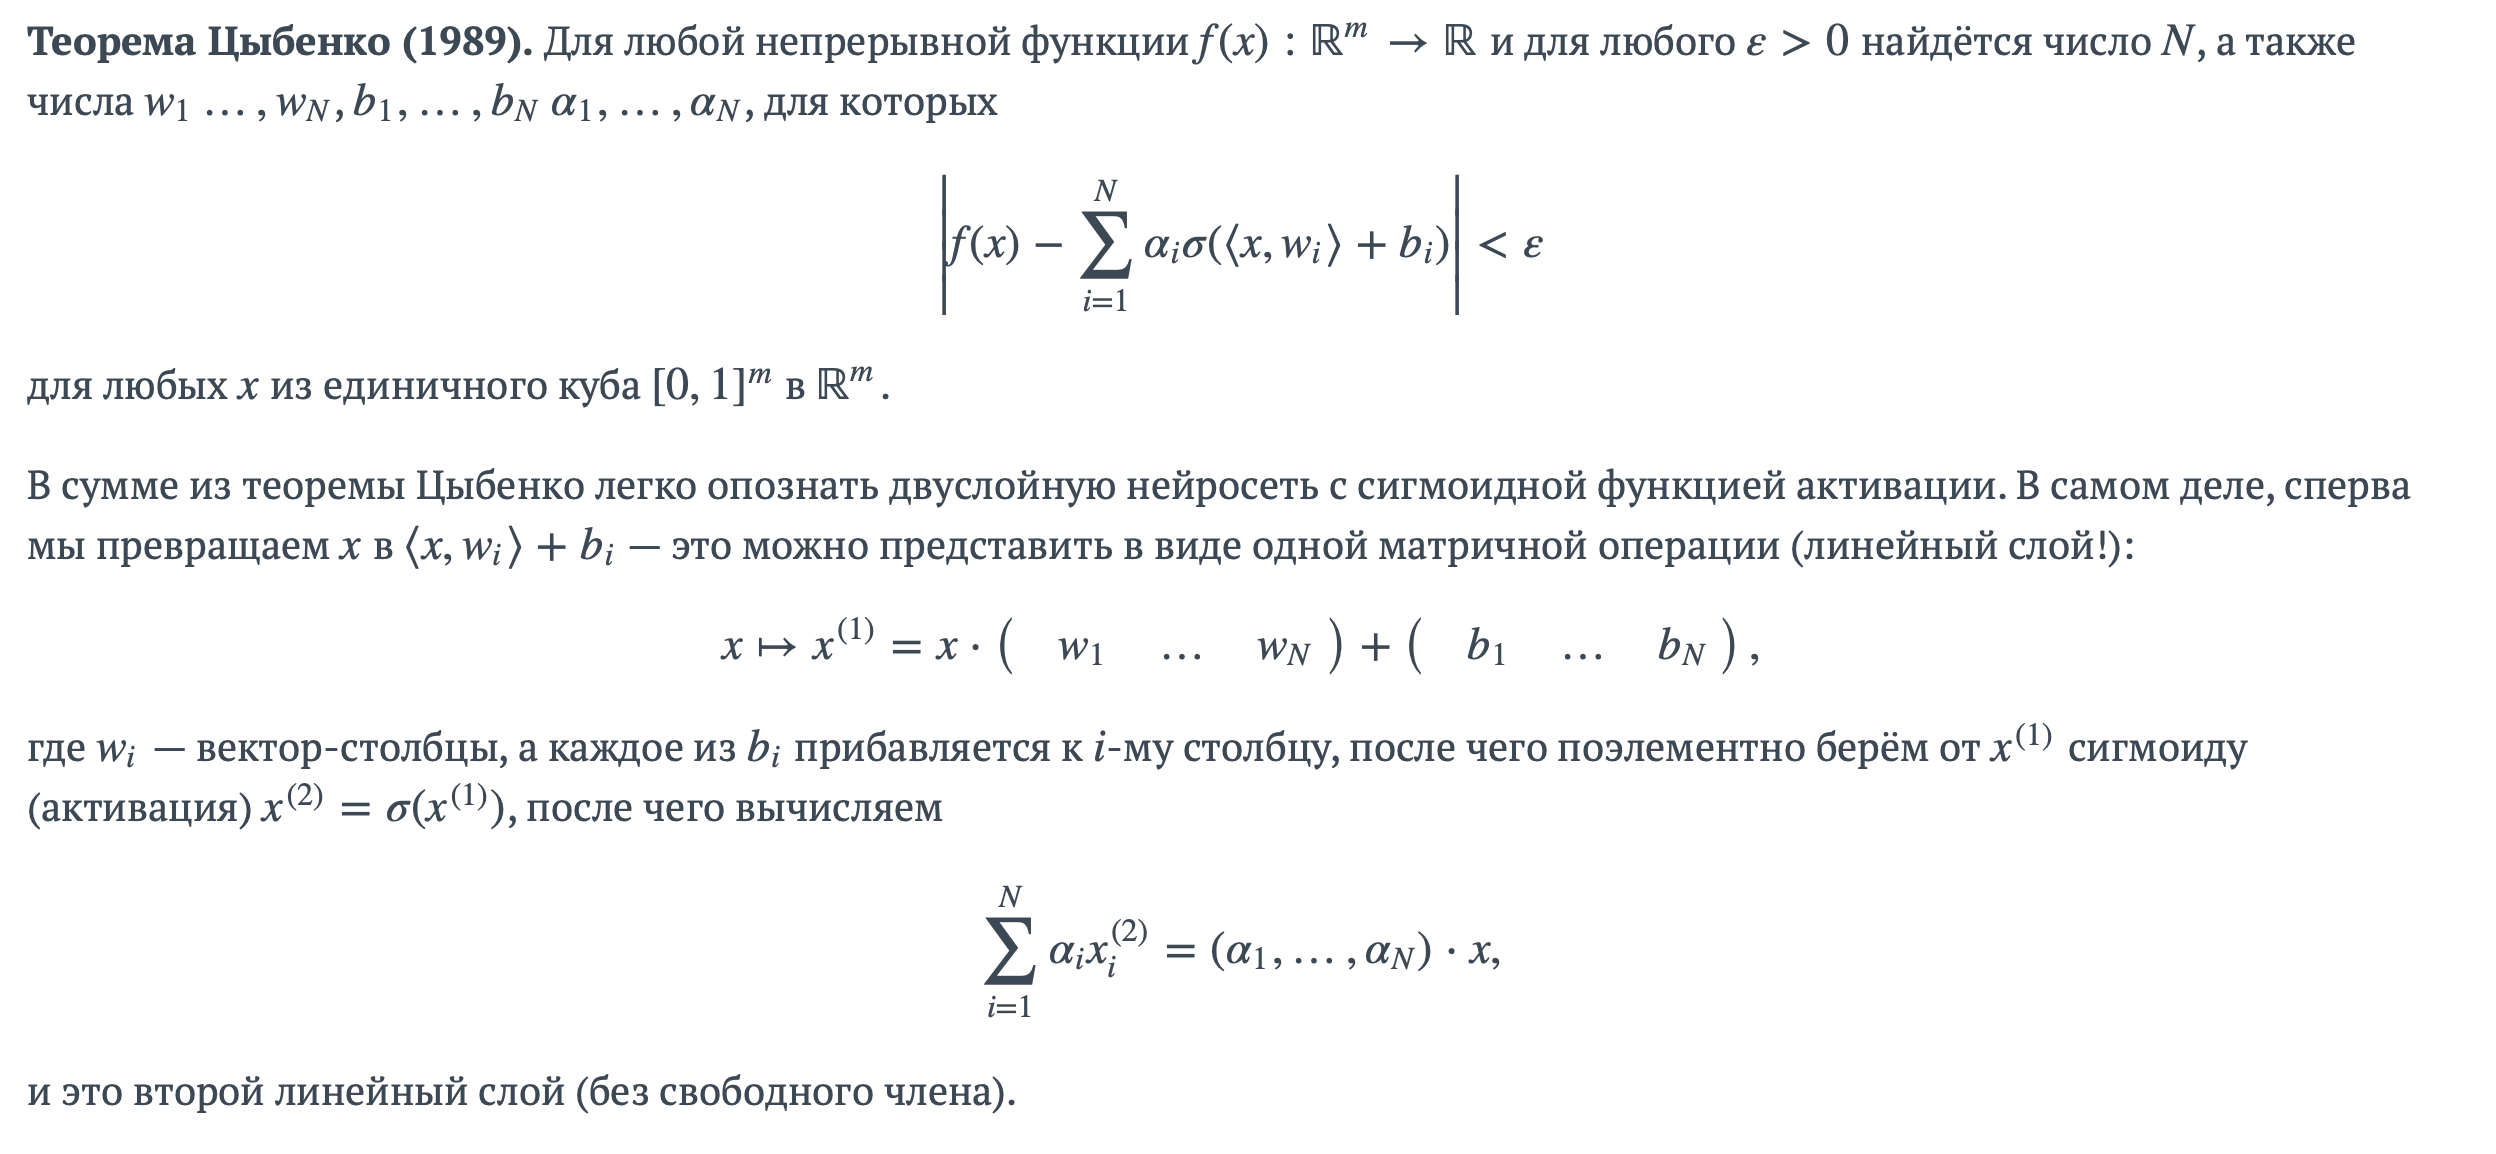

In [15]:
Image('images/cybenko.png', width=800)

## 7.2 Пример обучения одномерной нейронной сети
[Взято из туториала](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

Хотим с помощью нейронки обучить функцию $y = sin(x)$ 

в пространстве полиномов $y = a + bx + cx^2 + dx^3$

### 7.2.1 Градиентный спуск на торче и тензорах

99 3468.10986328125
199 2297.757080078125
299 1523.4300537109375
399 1011.0992431640625
499 672.102783203125
599 447.7875061035156
699 299.3499450683594
799 201.11859130859375
899 136.10850524902344
999 93.08189392089844
1099 64.6033706665039
1199 45.752471923828125
1299 33.27367401123047
1399 25.012453079223633
1499 19.542844772338867
1599 15.921248435974121
1699 13.52305793762207
1799 11.934814453125
1899 10.882871627807617
1999 10.186036109924316
Result: y = -0.007087797857820988 + 0.8213693499565125 x + 0.0012227618135511875 x^2 + -0.08829909563064575 x^3


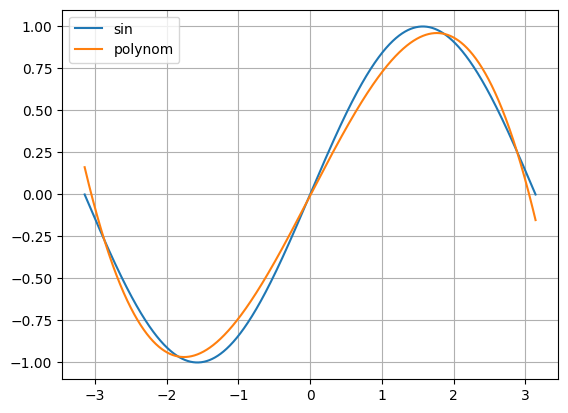

In [16]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss, MSE
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
def f(x):
    return a + b * x + c * x**2 + d * x**3

plt.plot(x,np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.legend()
plt.grid()

### 7.2.2 Используем Autograd

99 1370.0648193359375
199 911.1704711914062
299 607.0762939453125
399 405.5327453613281
499 271.93536376953125
599 183.36329650878906
699 124.63150024414062
799 85.67940521240234
899 59.840511322021484
999 42.69663619995117
1099 31.319169998168945
1199 23.766820907592773
1299 18.752365112304688
1399 15.421941757202148
1499 13.209454536437988
1599 11.739169120788574
1699 10.761807441711426
1799 10.111873626708984
1899 9.679512977600098
1999 9.391807556152344
Result: y = -0.008685304783284664 + 0.8348459601402283 x + 0.001498359371908009 x^2 + -0.09021603316068649 x^3


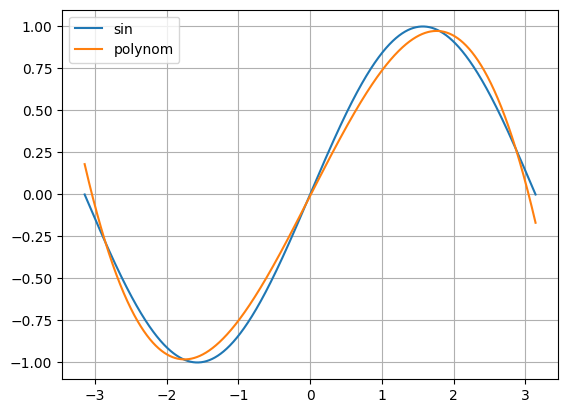

In [17]:
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum()
    
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

def f(x):
    return a.detach().numpy() + b.detach().numpy() * x + c.detach().numpy() * x ** 2 + d.detach().numpy() * x ** 3

xx = x.numpy()

plt.plot(xx, np.sin(x), label='sin')
plt.plot(xx, f(xx), label='polynom')
plt.legend()
plt.grid()

## 7.2.3 Используем нейросеть + встроенный лосс

In [18]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [19]:
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [20]:
# Define model
model = nn.Sequential(
    nn.Linear(3, 1),
    nn.Flatten(0, 1)
)

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0487,  0.4197, -0.3528]], requires_grad=True)
Parameter containing:
tensor([-0.3661], requires_grad=True)


99 124.22244262695312
199 85.18294525146484
299 59.35235595703125
399 42.26072311401367
499 30.95098876953125
599 23.4668025970459
699 18.51388168334961
799 15.23592758178711
899 13.066374778747559
999 11.63038158416748
1099 10.679811477661133
1199 10.050542831420898
1299 9.633941650390625
1399 9.358115196228027
1499 9.175474166870117
1599 9.054523468017578
1699 8.974428176879883
1799 8.921372413635254
1899 8.886226654052734
1999 8.862939834594727
Result: y = 0.0013542122906073928 + 0.8502828478813171 x + -0.0002336244797334075 x^2 + -0.09241179376840591 x^3


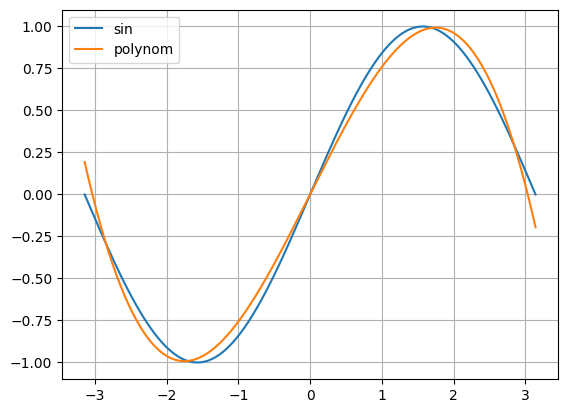

In [21]:
# Define model
model = nn.Sequential(
    nn.Linear(3, 1),
    nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for it in range(2000):
    # Forward pass: все до последней ноды
    y_pred = model(xx) 

    # Compute loss: финальная нода с лоссом
    loss = loss_fn(y_pred, y)
    if it % 100 == 99:
        print(it, loss.item())

    # Обнулили градиенты с прошлой итерации
    model.zero_grad()    
        
    # Backward pass: просчитали градиенты назад
    loss.backward()

    # Update the weights using gradient descent. 
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

            

# просто рисовалка      
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
def f(x):
    return linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
           linear_layer.weight[:, 1].item() * x ** 2 + linear_layer.weight[:, 2].item() * x ** 3

x = x.detach()
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.legend()
plt.grid()

## 7.2.4 Используем стохастический спуск. Идея обособленного оптимайзера

99 214.29393005371094
599 133.02133178710938
1099 38.6213493347168
1599 15.38490104675293


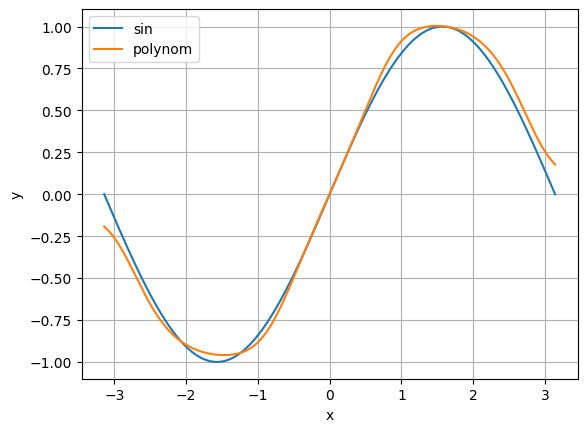

In [22]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Сделали шаблон сети
model = nn.Sequential(
    nn.Linear(3, 4),
    nn.Sigmoid(),
    nn.Linear(4, 5),
    nn.Sigmoid(),
    nn.Linear(5, 1),
    nn.Flatten(0, 1)
)

# Обозначили лосс
loss_fn = torch.nn.MSELoss(reduction='sum')

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# Спуск
for t in range(2000):
    # Нашли результат на текущей сети
    y_pred = model(xx)

    # Посчитали ошибку
    loss = loss_fn(y_pred, y)
    if t % 500 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


@torch.no_grad()
def f(x):
    xx = x.unsqueeze(-1).pow(p)
    return model(xx).reshape(-1).numpy()

plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

![title](https://cs231n.github.io/assets/nn3/opt1.gif)

## 7.2.5 А если взять несколько слоев?

99 796.83251953125
199 767.560791015625
299 745.19091796875
399 705.5804443359375
499 587.3168334960938
599 232.47491455078125
699 9.589506149291992
799 8.817187309265137
899 8.817168235778809
999 8.817168235778809
1099 8.817169189453125
1199 8.817168235778809
1299 8.817168235778809
1399 8.817168235778809
1499 8.817168235778809
1599 8.817168235778809
1699 8.817167282104492
1799 8.817167282104492
1899 8.817167282104492
1999 8.817167282104492


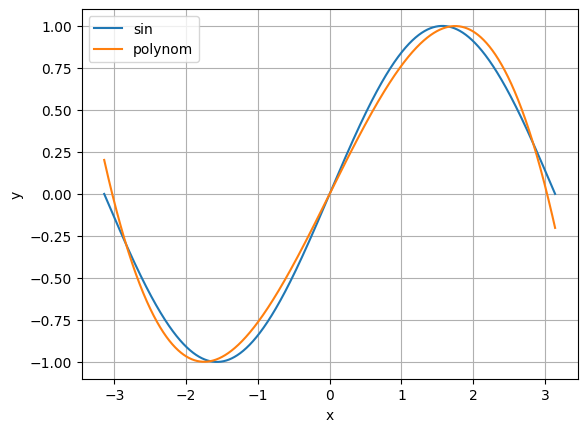

In [23]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# МНО00ГО00СЛО00ЙНАЯ СЕТЬ
model = torch.nn.Sequential(
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# Обозначили лосс
loss_fn = torch.nn.MSELoss(reduction='sum')

# Выбрали алгоритм оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Спуск
for t in range(2000):
    
    # Нашли результат на текущей сети
    y_pred = model(xx)

    # Посчитали ошибку
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


    
# просто рисовалка   
# а вот тут формулы не существует :))
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, model(xx).detach().numpy(), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

### А имеет ли смысл брать несколько слоев?

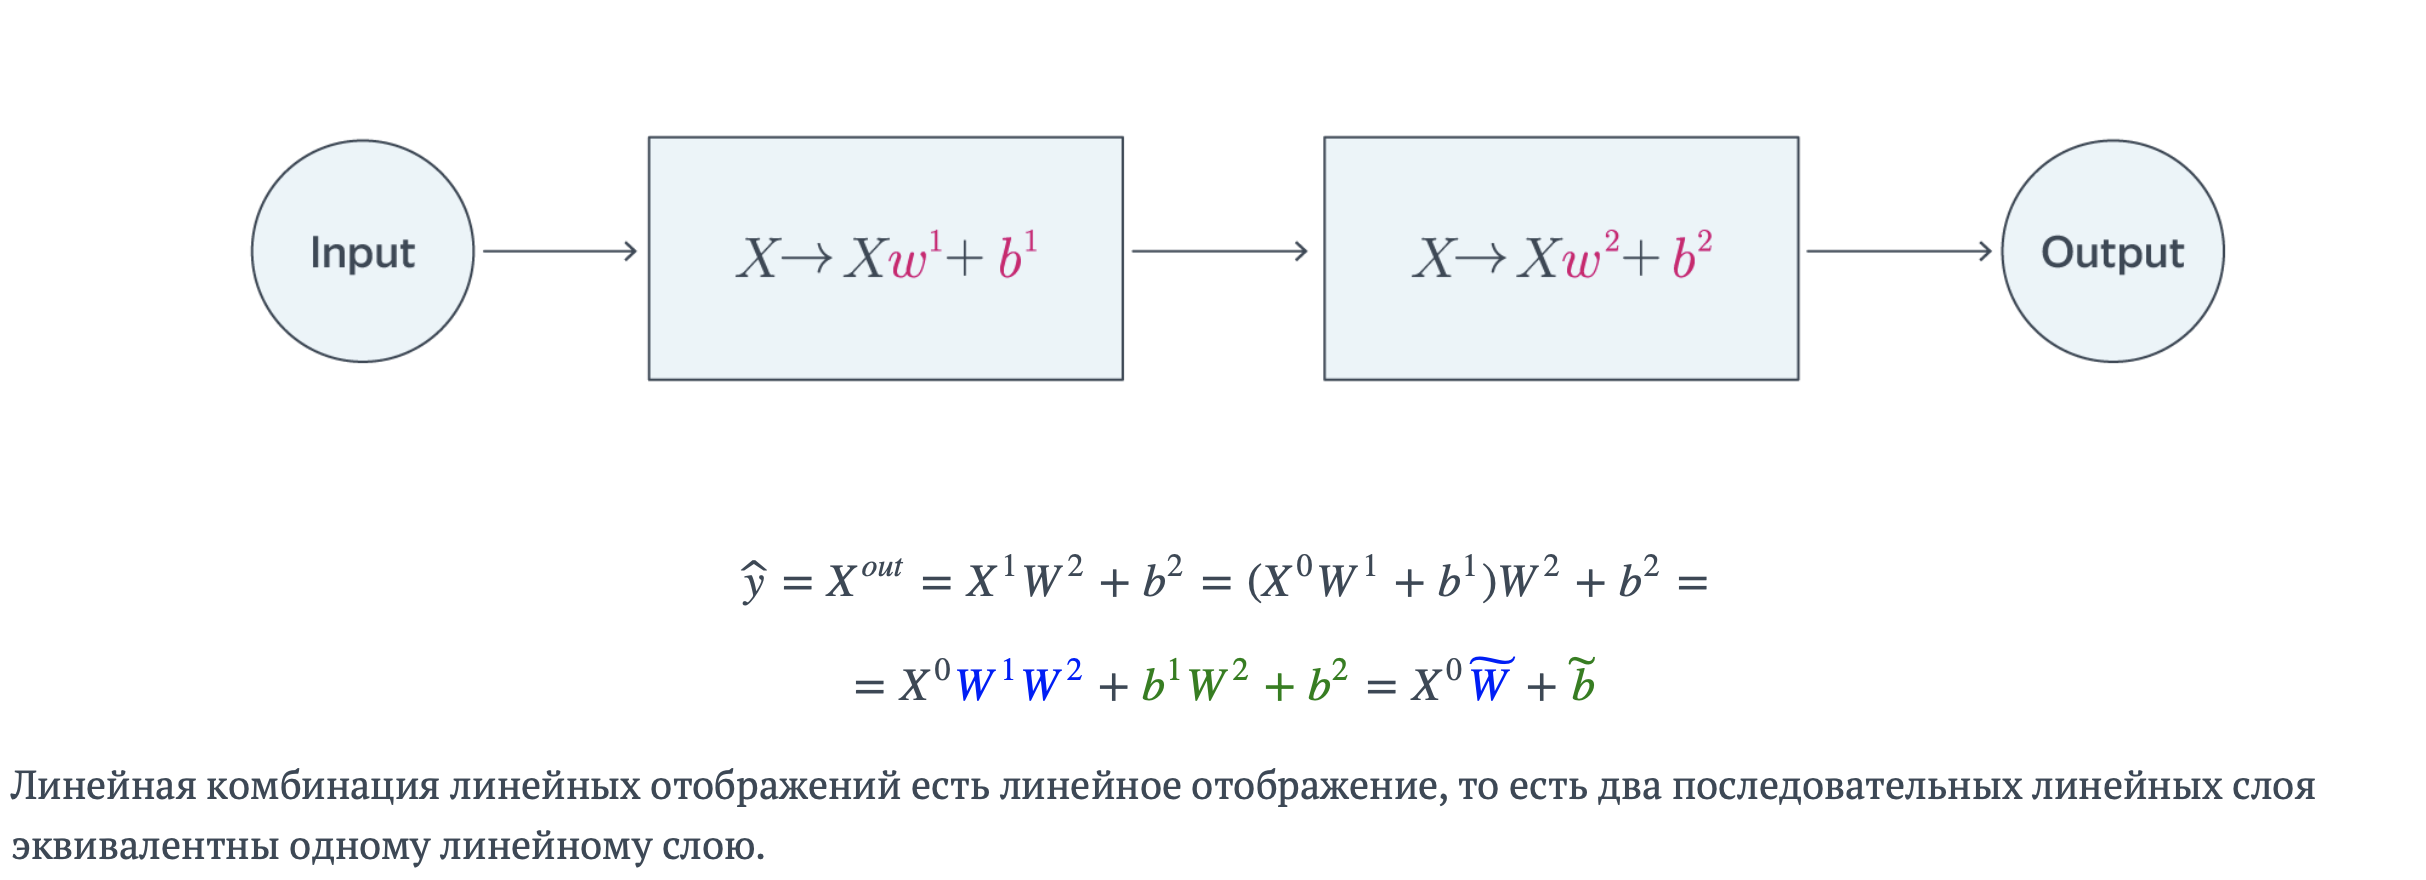

In [24]:
Image('images/2linear.png')

## 7.2.6 Функции активации

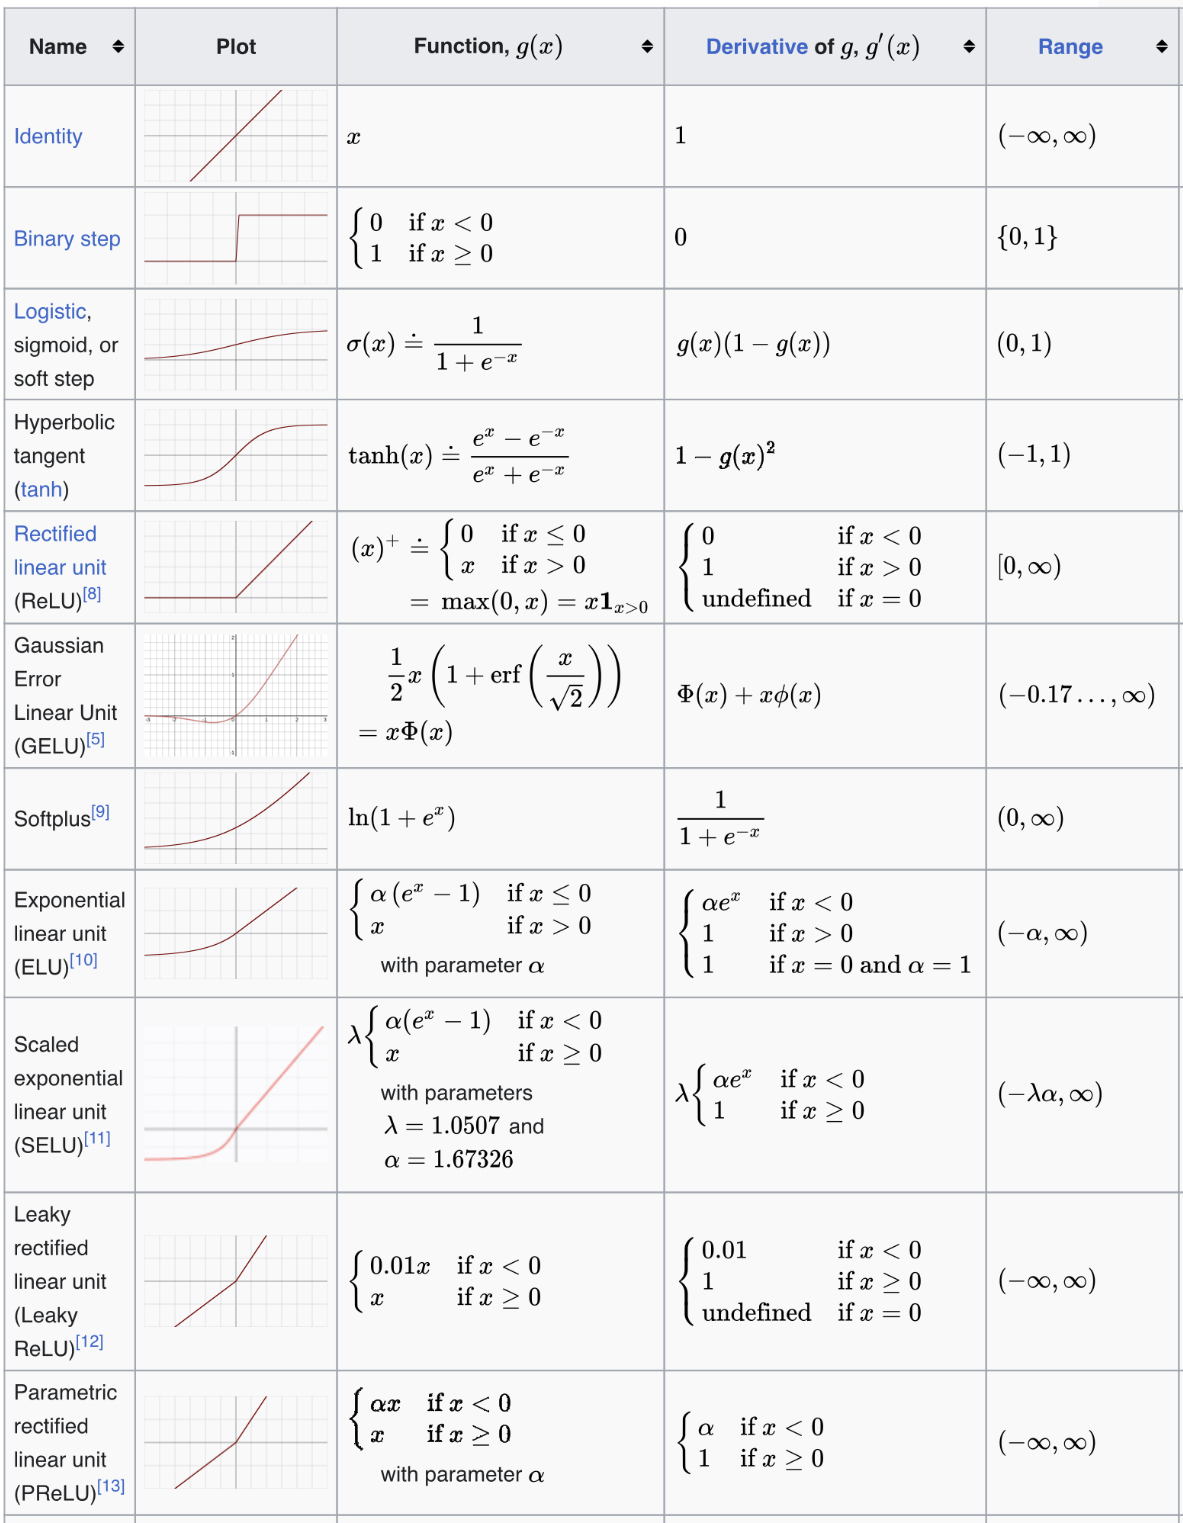

In [25]:
Image("images/activations2.jpg")

# Так и еще раз на закрепление:
* FORWARD (посчитали вперед по существующей сети)
* LOSS (посчитали ошибку)
* ZERO_GRAD (обнулили градиенты)
* BACKWARD (посчитали производные)
* UPDATE Weights (обновили веса)
